# Digit Clustering

We're coming back to our familiar digits examples. We'll first review what the dataset looks like, its accessors, how to plot them, and get onto the cool task of k means clustering

In [16]:
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [17]:
digits = datasets.load_digits()
data = digits.data
data.shape

(1797, 64)

Recall that in addition to the digit pixels, we are given the target variables (i.e. what label or number these pixels are associated with)

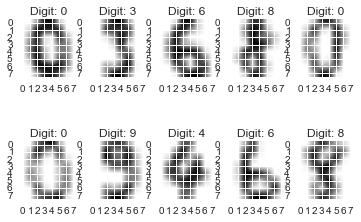

In [18]:
sample_idx = np.random.choice(range(data.shape[0]),10,replace=False)

for plotidx,idx in enumerate(sample_idx):
    plt.subplot(2,5,plotidx+1)
    pic = data[idx].reshape(8,8)
    plt.imshow( pic, cmap=plt.cm.gray_r) #Color map, or cmap provides a mapping between the values, and the represented colors
    plt.title("Digit: %d" % digits.target[idx])

## K Means on clustering

Suppose we are very young children who have never learned the digits (but know K Mean clustering for some reason).

If we were given the labels associated with these digit images, we could generalize from multiple images and learn what a "1" should look like.

What if we were NOT given labels? What if we were only told there are 10 different clusters or types of digits out there?

Perhaps we could run some clustering to figure out what these 10 different types of digits should look like...

In [19]:
km = cluster.KMeans(n_clusters=10)

In [20]:
km.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
km.cluster_centers_

array([[  0.00000000e+00,   2.77555756e-16,   3.22580645e-02,
          1.84946237e+00,   1.10645161e+01,   1.25268817e+01,
          4.21505376e+00,   2.58064516e-01,   8.67361738e-19,
          5.37634409e-02,   1.95698925e+00,   8.93548387e+00,
          1.37741935e+01,   1.24301075e+01,   5.27956989e+00,
          3.22580645e-01,   4.33680869e-19,   1.56989247e+00,
          8.66666667e+00,   1.24408602e+01,   1.19032258e+01,
          1.28387097e+01,   3.98924731e+00,   1.39784946e-01,
         -1.30104261e-18,   3.55913978e+00,   1.19784946e+01,
          1.17634409e+01,   1.29354839e+01,   1.35376344e+01,
          2.61290323e+00,  -2.60208521e-18,   0.00000000e+00,
          1.94623656e+00,   6.87096774e+00,   7.44086022e+00,
          1.18172043e+01,   1.26021505e+01,   1.89247312e+00,
          0.00000000e+00,  -1.04083409e-17,   7.84946237e-01,
          2.01075269e+00,   3.77419355e+00,   1.16774194e+01,
          1.19354839e+01,   1.20430108e+00,  -2.08166817e-17,
        

In [22]:
km.cluster_centers_.shape

(10, 64)

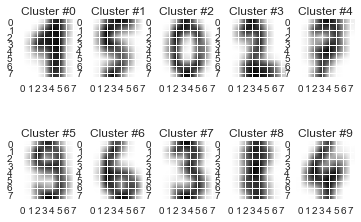

In [23]:
clusters = km.cluster_centers_.reshape((10,8,8))

for idx in range(clusters.shape[0]):
    plt.subplot(2,5,idx+1)
    plt.imshow( clusters[idx], cmap=plt.cm.gray_r) #Color map, or cmap provides a mapping between the values, and the represented colors
    plt.title("Cluster #%d" % idx)

Super cool!! We did not give the algorithm any information other than the raw data (and a bit of a hint into how many clusters to create). And yet, the resulting cluster centers (**centroids**) are seem fair separated and look like familiar representations of 0-9.

What if we were wrong about the hint? What if we were wrongly told there were only 4 unique clusters? What would the centroids or 'average digit' look like?

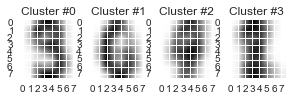

In [24]:
n_k = 4
km = cluster.KMeans(n_clusters=n_k)
km.fit(data)
clusters = km.cluster_centers_.reshape((n_k,8,8))

for idx in range(clusters.shape[0]):
    plt.subplot(2,5,idx+1)
    plt.imshow( clusters[idx], cmap=plt.cm.gray_r) #Color map, or cmap provides a mapping between the values, and the represented colors
    plt.title("Cluster #%d" % idx)

Interesting. Most of these clusters look like amalgamations of each other! i.e. The cluster centroids look like a 4 mixed with an 8, a 3 mixed with an 8, a 2 mixed with a 1, a 0 mixed with a 6, and so on.

What if we went too far the other way. What if we mistakenly added 20 characters?

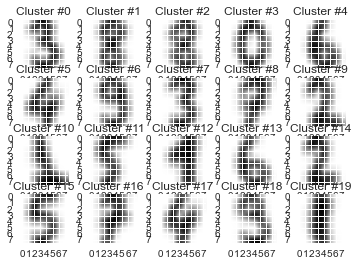

In [25]:
n_k = 20
km = cluster.KMeans(n_clusters=n_k)
km.fit(data)
clusters = km.cluster_centers_.reshape((n_k,8,8))

for idx in range(clusters.shape[0]):
    plt.subplot(4,5,idx+1)
    plt.imshow( clusters[idx], cmap=plt.cm.gray_r) #Color map, or cmap provides a mapping between the values, and the represented colors
    plt.title("Cluster #%d" % idx)

Also interesting--a lot of these digits look like repeats or slight variations. i.e. We have more clusters than might naturally fit the data.

# Exercise

This exercise is difficult, but should prove very rewarding! We're going to do some image compression by reducing the number of colors possible.

The flower jpeg example is a 427 x 640 image. Each pixel has 3 RGB values that range from 0 to 255, where [255,0,0] would represent a purely red pixel, [0,255,0] would represent a purely green pixel, and [255,255,0] would represent an orange pixel.

As you can imagine, this means that there are 256 x 256 x 256 possible colors, requiring 24 bits = 3 bytes. What if we wanted to compress, or reduce an image's color palette to just 8 possible colors?

We are going to do just that through k means clustering!

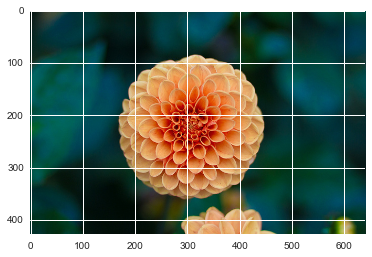

In [26]:
flower = datasets.load_sample_image("flower.jpg")
flower = np.array(flower, dtype=np.float64) / 255.0 #Convert this to a float
plt.imshow(flower)

Observe a few attributes of `flower` (i.e. check its shape, dimensions)

In [27]:
flower.shape

(427, 640, 3)

You can essentially repeat the code above in the digits example. HOWEVER, you will need to be able to transform your image array correctly.

This will be our process:

1. Original Flower shape is h = 427, w = 640, and d = 3. Where d is length 3--one for each r, g, b channel
2. Reshape flower into shape (h*w, d). This way we have a simple 2d array, where each row is a pixel, and the columsn correspond to r, g, b values
3. Run K Means on this array. We want to choose 16 clusters. **This represents finding the 16 most similar colors!**
4. Now set each value in our 2d array with the values of the closest centroid. Hint: if your KMeans model is called km, you can run: km.cluster_centers_[ km.predict( your2DImageArray ) ) for a one liner
5. Finally, we need to reshape this 2d array of (h*w,d) back into a 3d array of (h,w,d)
6. Plot this resulting array. **You should be positively amused at the resulting image.** If you are not, press [shift]+[enter] on the code block again.

Notes: It might take a while to find the clusters, so be patient (<10 seconds).



Once you're finished, I'd like you to **describe** what's going on. Just like almost any SKLearn model / implementation out there, using the software is easy. Understanding what's going on under the hood is the real goal.

In [28]:
h, w, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (h * w, d))

In [29]:
n_k=8
km = cluster.KMeans(n_clusters=n_k)
km.fit(image_array)
condensed_array = km.cluster_centers_[km.predict(image_array)]

In [ ]:
plt.imshow(condensed_array.reshape((h,w,d)))